# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import torch
from collections import deque
import progressbar as pb
import time
import parquet
import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
import config
import utils
from ddpg_agent_multi import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="C:/Users/Simon/PYTHON/Deep_Reinforcement_Learning_Nanodegree_UDACITY/Projet3_Collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0],'\n')
print('rThe state for the second agent looks like:', states[1],'\n')
print('rewards type:', type(env_info.rewards))
print('rewards:', env_info.rewards)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ] 

rThe state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ] 

rewards type: <class 'list'>
rewards: [0.0, 0.0]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
'''for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))'''

"for i in range(1, 6):                                      # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_info.rewards                 

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, n_agents=num_agents, random_seed=config.random_seed, episodes=config.n_episodes)

In [8]:
def ddpg(episodes=config.n_episodes,  max_t=config.max_t, moving_average_period=config.moving_average_period, print_interval=config.print_interval, target_score = config.target_score):
    """DDQN Algorithm.
    
    Params
    ======
        episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        moving_average_period (int): frequency of printing information throughout iteration
        print_interval (int): interval at which information is printed
        target_score (int): goal that stops learning
        """
    
    #agent = Agent(state_size=state_size, action_size=action_size, n_agents=num_agents, random_seed=config.random_seed, episodes=episodes)

    # Record the start time before training begins
    start_time = time.time()

    # Initialize lists and dataframe
    episodes_list = []
    time_list = []
    scores_blue = []
    scores_blue_deque = deque(maxlen=moving_average_period)
    scores_red = []
    scores_red_deque = deque(maxlen=moving_average_period)
    scores = []
    scores_deque = deque(maxlen=moving_average_period)
    critic_losses = []
    critic_losses_deque = deque(maxlen=moving_average_period)
    actor_losses = []
    actor_losses_deque = deque(maxlen=moving_average_period)
    noise_sigma = []
    df = pd.DataFrame(columns=['Episode', 'Score', 'Average Scores', 'Actor losses', 'Average Actor losses', 'Critic losses', 'Average Critic losses', 'Noise Sigma', 'PER Beta', 'Time'])
    PER_df = pd.DataFrame()
    param_df = pd.DataFrame()
    
    # Make folders
    folders = ['data', 'weights', 'plots', 'reports']
    for folder in folders:
        folder_path = os.path.join(os.getcwd(), folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
    
    # Learning
    for i_episode in range(1, episodes+1):
        # Reset the enviroment
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment 
        # get the the first state 
        cur_states = env_info.vector_observations               # get the current state (for each agent)
        # Reset the noise process associated with the agent for stochastic exploration
        agent.reset(i_episode)      
        score = np.zeros(num_agents)                            # initialize the score (for each agent)
        score_blue = 0
        score_red = 0
        critic_loss = np.zeros(num_agents)
        actor_loss = np.zeros(num_agents)
        
        time_episode_start = time.time()
        num_steps = 0
            
        for t in range(1, max_t+1):
            # Predict the best action for the current state. 
            actions = agent.act(cur_states) # actions = agent.act(cur_states)    
            # Action is performed and new state, reward are received. 
            env_info = env.step(actions)[brain_name]             # send all actions to the environment
            next_states = env_info.vector_observations           # get next state (for each agent)
            rewards = env_info.rewards                           # get reward (for each agent)
            dones = env_info.local_done                          # see if episode finished
               
            ## Store experience of all the agents in the experience replay and take step with agent (including learning)
            agent.step_memory_and_learn(states=cur_states, actions=actions, rewards=rewards, next_states=next_states, dones=dones) # take step with agent (including learning)
            # roll over new state
            cur_states = next_states
            
            # update indicators
            score_blue += rewards[0]
            score_red += rewards[1]
            #score += np.array(rewards)                           # update the score (for each agent)
            score += max(rewards[0], rewards[1])

            if agent.last_critic_loss is not None:
                critic_loss += agent.last_critic_loss            # Access the last loss records of the agents
            else :
                critic_loss += np.NaN                            # or 0 to indicate the absence of loss calculation and avoid an error  
            if agent.last_actor_loss is not None: # Access the last loss records of the agents
                actor_loss += agent.last_actor_loss
            else :
                actor_loss += np.NaN
            
            num_steps += 1
            if np.any(dones):                                     # exit loop if timestep finished
                break
                
        # Time mesuremenent       
        time_episode_str = time.strftime('%Mm%Ss', time.gmtime(time.time() - time_episode_start))

        # append data in lists
        episodes_list.append(i_episode)
        time_list.append(time_episode_str)
        scores.append(np.mean(score))                             # score = list of num_agents score
        scores_deque.append(np.mean(score))
        
        scores_blue.append(np.mean(score_red))                             
        scores_blue_deque.append(np.mean(score_red))
        scores_red.append(np.mean(score_red))                             
        scores_red_deque.append(np.mean(score_red))
        
        critic_losses.append(np.mean(critic_loss/num_steps))      # divide by num_steps to normalize in order to compare data  
        critic_losses_deque.append(np.mean(critic_loss/num_steps))
        actor_losses.append(np.mean(actor_loss/num_steps))
        actor_losses_deque.append(np.mean(actor_loss/num_steps))   
        noise_sigma.append(np.mean(agent.noise.sigma))

        warnings.filterwarnings("ignore", category=RuntimeWarning) # Temporarily suppress the display of RuntimeWarning warnings (error=mean(Nan) in 1st episode)
        critic_losses_deque_mean = np.nanmean(critic_losses_deque)
        actor_losses_deque_mean = np.nanmean(actor_losses_deque)
        warnings.filterwarnings("default", category=RuntimeWarning) # Restore default RuntimeWarning behavior
            
        # Record metrics in a DataFrame
        episode_data = {
                'Episode': i_episode,
                'Score': scores[-1],  
                'Average Scores': np.mean(scores_deque),
                'Blue Score': scores_blue[-1],  
                'Average Blue Scores': np.mean(scores_blue_deque),
                'Red Score': scores_red[-1],  
                'Average Red Scores': np.mean(scores_red_deque),
                'Actor losses': actor_losses[-1],
                'Average Actor losses': actor_losses_deque_mean,
                'Critic losses': critic_losses[-1],
                'Average Critic losses': critic_losses_deque_mean, 
                'Noise Sigma': noise_sigma[-1],
                'PER Beta': agent.beta,
                'Time': time_list[-1]
            }
        df = df.append(episode_data, ignore_index=True)
        
        # Record weights and gradients in a DataFrame
        agent.record_weights_and_gradients(i_episode)
        episode_metrics = pd.DataFrame([agent.weights_data_episode])                      
        param_df = pd.concat([param_df, episode_metrics], ignore_index=True)

        # Temporary print 
        if i_episode % print_interval != 0:
            current_time = passed_time(start_time, format_type="hours_minutes_seconds")
            sys.stdout.write(f"\rEpisode: {i_episode} ({current_time})\tAvg Score: {np.mean(scores_deque):.2f}\tScore: {np.mean(score):.2f}\tSigma: {agent.noise.sigma:.3f}\tBeta: {agent.beta:.3f}\tAvg Actor Loss: {actor_losses_deque_mean:.3f}\tAvg Critic Loss: {critic_losses_deque_mean:.5f}") 
            sys.stdout.flush()
            
        # Permanent print and save data
        else:
            current_time = passed_time(start_time, format_type="hours_minutes")
            print(f"\rEpisode: {i_episode} ({current_time})\tAverage Score: {np.mean(scores_deque):.2f}\tScore: {np.mean(score):.2f}\tSigma: {agent.noise.sigma:.3f}\tBeta: {agent.beta:.3f}\tAvg Actor Loss: {actor_losses_deque_mean:.3f}\tAvg Critic Loss: {critic_losses_deque_mean:.5f}")  
            save_data(df, param_df, agent.weight_magnitudes, agent.td_errors_history)

        # Print - Environment solved 
        if np.mean(scores_deque) >= target_score:
            print('\nEnvironment solved in {} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            break
    
    # Save data to parquet       
    save_data(df, param_df, agent.weight_magnitudes, agent.td_errors_history)

    # Print total execution time
    end_time = time.time()
    learning_time = (end_time - start_time)/60
    current_time = passed_time(start_time, format_type="hours_minutes")
    print(f'\n\nExecution time : {current_time}')

    # Print hyperparameters
    print("\n-----Project rules and hyperparameters :-----")
    for name, value in vars(config).items():
        if not name.startswith('__'):
            print(f"{name} = {value}")
            
    return 


def save_data(df, param_df, weight_magnitudes, td_errors_history):
    # save list to DataFrames
    df.to_parquet('data/results.parquet')
    param_df.to_parquet('data/gradients_bias.parquet')
    PER_dic = {
            'weight_magnitudes': weight_magnitudes,  
            'Average td_errors_history': td_errors_history,
            }
    PER_df = pd.DataFrame(PER_dic)
    PER_df.to_parquet('data/PER.parquet')
    # save the weights
    torch.save(agent.actor_local.state_dict(), 'weights/checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'weights/checkpoint_critic.pth')
    # save hyperparameter values
    with open('data/config_values.txt', 'w') as file:
        for name, value in vars(config).items():
            if not name.startswith('__'):  
                file.write(f"{name} = {value}\n")  

def passed_time(start_time, format_type="hours_minutes_seconds"):
    elapsed_seconds = int(time.time() - start_time)
    hours, remainder = divmod(elapsed_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    if format_type == "seconds":
        return f"{elapsed_seconds} secondes"
    elif format_type == "minutes":
        total_minutes = hours * 60 + minutes
        return f"{total_minutes} minutes"
    elif format_type == "hours_minutes":
        return f"{hours}h{minutes}m"
    #  Default format includes hours, minutes and seconds
    return f"{hours}h{minutes}m{seconds}s"


In [9]:
# Start the DDPG algorithm with specified parameters
ddpg(episodes=config.n_episodes, max_t=config.max_t, moving_average_period=config.moving_average_period, \
                     print_interval=config.print_interval, target_score = config.target_score)

Episode: 100 (0h0m)	Average Score: 0.00	Score: 0.00	Sigma: 0.138	Beta: 0.475	Avg Actor Loss: -0.033	Avg Critic Loss: 0.00003
Episode: 200 (0h1m)	Average Score: 0.00	Score: 0.00	Sigma: 0.095	Beta: 0.550	Avg Actor Loss: -0.032	Avg Critic Loss: 0.00001
Episode: 300 (0h3m)	Average Score: 0.01	Score: 0.00	Sigma: 0.065	Beta: 0.625	Avg Actor Loss: -0.033	Avg Critic Loss: 0.00001
Episode: 400 (0h4m)	Average Score: 0.02	Score: 0.10	Sigma: 0.045	Beta: 0.700	Avg Actor Loss: -0.037	Avg Critic Loss: 0.00001
Episode: 500 (0h6m)	Average Score: 0.06	Score: 0.10	Sigma: 0.031	Beta: 0.775	Avg Actor Loss: -0.044	Avg Critic Loss: 0.00001
Episode: 600 (0h11m)	Average Score: 0.19	Score: 0.10	Sigma: 0.021	Beta: 0.850	Avg Actor Loss: -0.066	Avg Critic Loss: 0.00002
Episode: 700 (0h15m)	Average Score: 0.19	Score: 0.30	Sigma: 0.015	Beta: 0.925	Avg Actor Loss: -0.102	Avg Critic Loss: 0.00002
Episode: 760 (0h25m26s)	Avg Score: 0.50	Score: 1.00	Sigma: 0.012	Beta: 0.970	Avg Actor Loss: -0.127	Avg Critic Loss: 0.0000

In [10]:
env.close()

In [11]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import torch
from collections import deque
import progressbar as pb
import time
import parquet
import datetime
import warnings
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from unityagents import UnityEnvironment
import config
import utils
from ddpg_agent_multi import Agent

In [12]:
# load training data
df = pd.read_parquet('data/results.parquet')
#df.head(3)

In [13]:
param_df = pd.read_parquet('data/gradients_bias.parquet') 
#param_df.head(3)

In [14]:
PER_df = pd.read_parquet('data/PER.parquet')
#PER_df.head(3)

### Tracking indicators

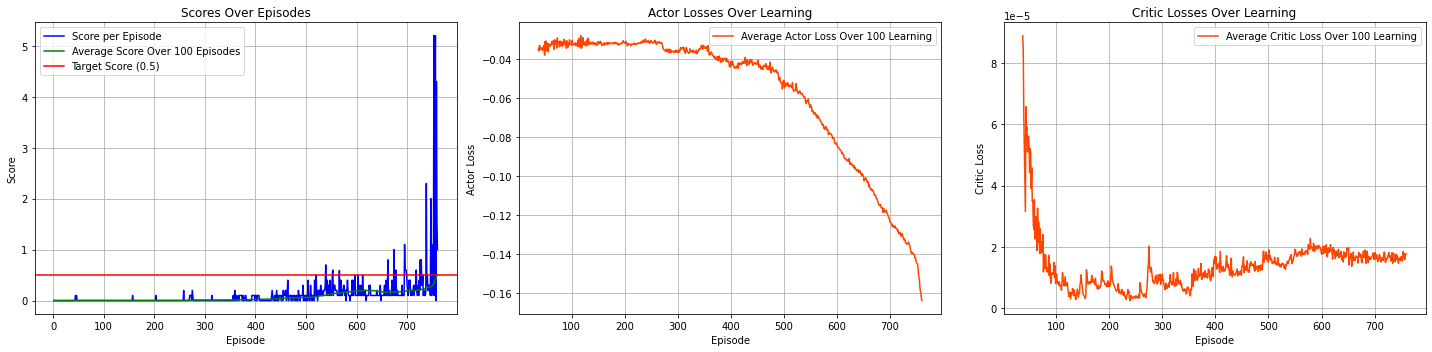

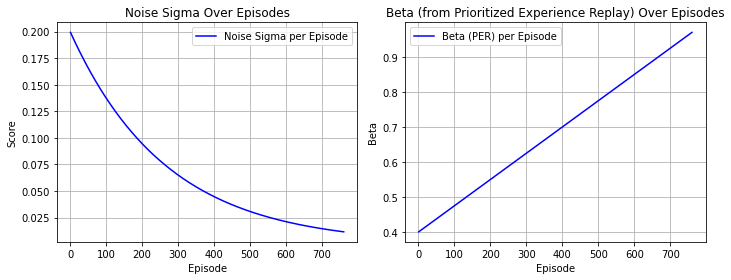

In [15]:
# Plot performances_indicators (scores, losses, Noise Sigma, Beta_PrioritizedReplayBuffer)
utils.plot_performances_indicators(df, PER_df)

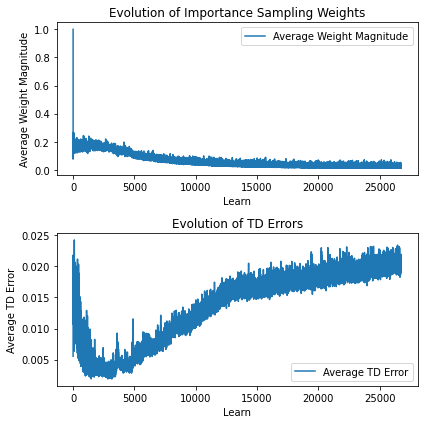

In [16]:
# Plot PrioritizedReplayBuffer parameter
utils.plot_per_parameters(PER_df['weight_magnitudes'], PER_df['Average td_errors_history'])

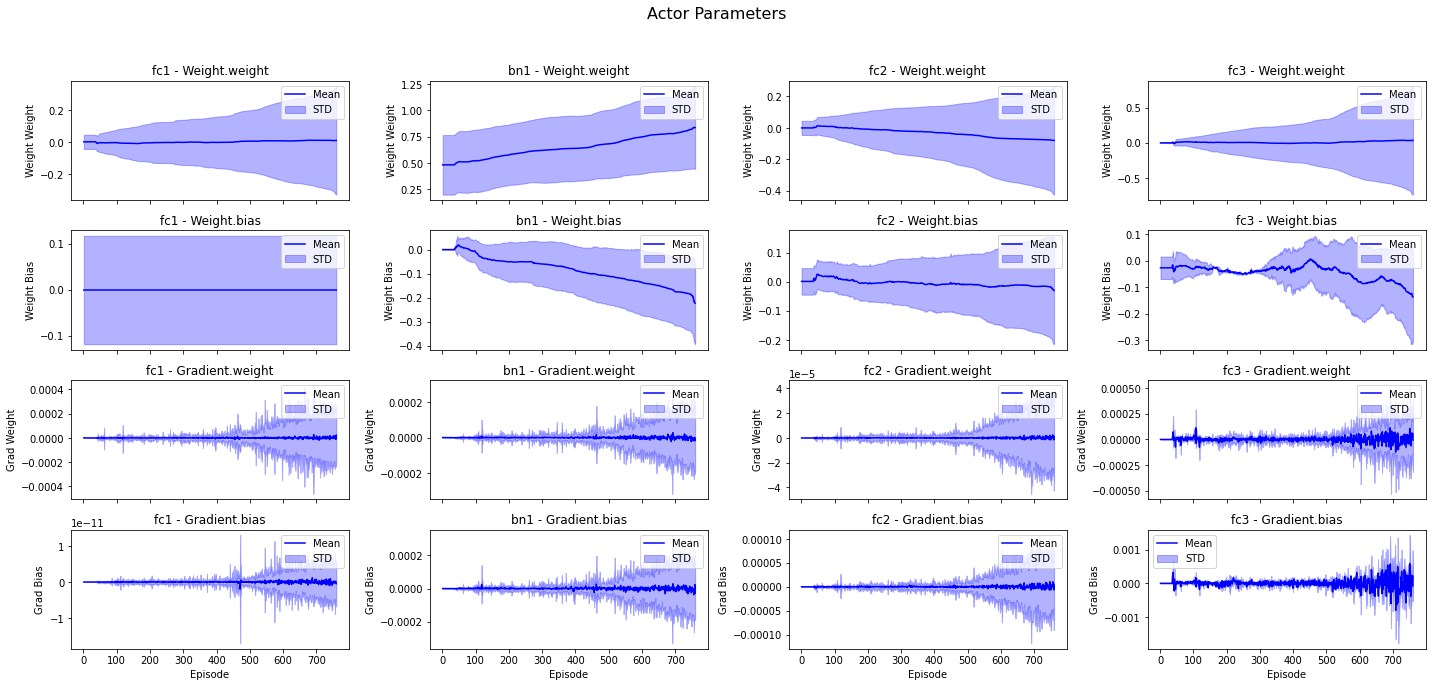

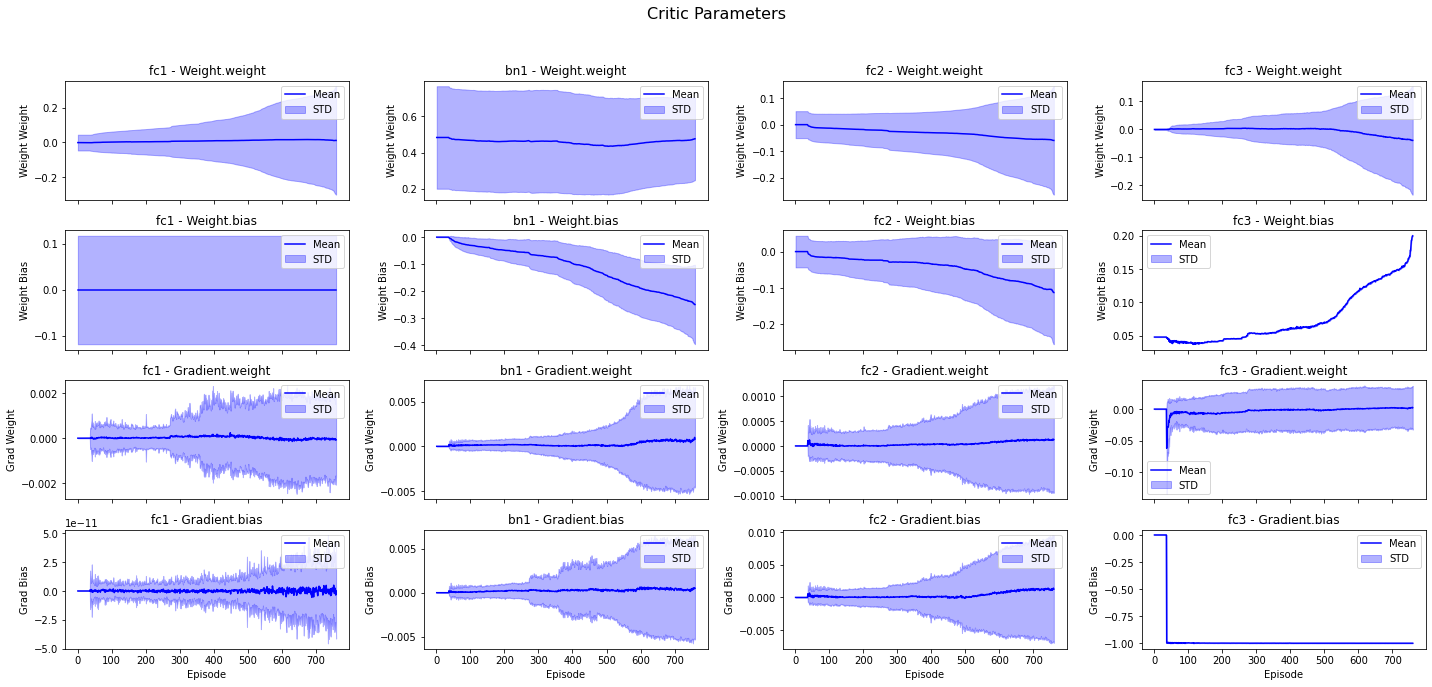

In [17]:
# plot weigts and gradient 
    # resize weigts and gradient data
raw_param_df = pd.read_parquet('data/gradients_bias.parquet', engine='auto') 
param_df = utils.resize_data(raw_param_df)
#param_df.head(3)
    # generate plots for 'actor' and 'critic'
utils.plot_weights_grad(param_df, 'actor', 'Actor Parameters')
print()
utils.plot_weights_grad(param_df, 'critic', 'Critic Parameters')

In [18]:
# Save printed results to a text file
utils.save_filtered_df_to_txt(df, config.print_interval)

### Save the training in a folder

In [19]:
# Create and store each training session in a dedicated folder for future performance comparison
utils.create_training_folder()

New training data saved in: .\tests\test_16


### Compare tests

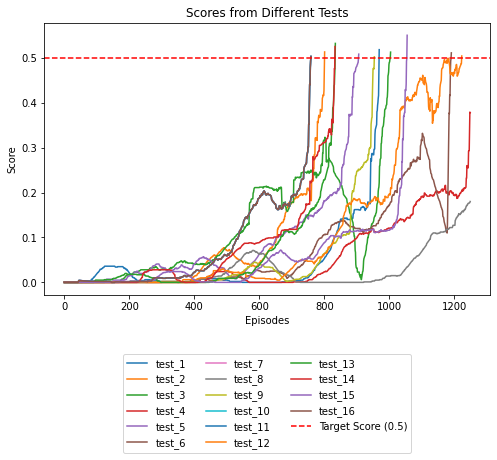

In [20]:
utils.plot_test_scores(root_dir='./tests', column_name ='Average Scores', episodes=1250, target_score=0.5)

### Watch Smart Agents

In [1]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import torch
from collections import deque
import progressbar as pb
import time
import parquet
import datetime
import warnings
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from unityagents import UnityEnvironment
import config
import utils
from ddpg_agent_multi import Agent

In [2]:
# Load simulation environment
env = UnityEnvironment(file_name="C:/Users/Simon/PYTHON/Deep_Reinforcement_Learning_Nanodegree_UDACITY/Projet3_Collab-compet/Tennis_Windows_x86_64/Tennis.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [4]:
# Create an instance of the agent (make sure it's the same as the one we trained)
agent = Agent(state_size=state_size, action_size=action_size, n_agents=num_agents, random_seed=config.random_seed, episodes=config.n_episodes)

# Load the trained weights from file

In [5]:
agent.actor_local.load_state_dict(torch.load('weights/checkpoint_actor.pth'))

In [6]:
agent.critic_local.load_state_dict(torch.load('weights/checkpoint_critic.pth'))

In [7]:
# Set the network to evaluation mode
agent.actor_local.eval()
agent.critic_local.eval()
for episode in range(3):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    cur_states = env_info.vector_observations              # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(cur_states, add_noise=False)   ## select actions from DDPG policy
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += rewards                                  # update the score (for each agent)
        cur_states = next_states                              # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.24500000476837158
Total score (averaged over agents) this episode: 0.5450000083073974


In [8]:
env.close()